In [597]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [598]:
data = pd.read_csv('train.csv')

In [599]:
data = data.loc[data['Rooms'] < 10, :]
data = data.loc[data['Price'].between(30000, 600000)]

In [600]:
data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


### Исправляем заведомо неправильные данные

In [601]:
data.loc[data['HouseYear'] == 20052011, 'HouseYear'] = 2005
data.loc[data['HouseYear'] == 4968, 'HouseYear'] = 1968
data.loc[data['Id'] == 14656, 'KitchenSquare'] = data.loc[data['Rooms'] == 1, 'Square'].mean()
data.loc[data['Id'] == 14679, 'KitchenSquare'] = data.loc[data['Rooms'] == 1, 'Square'].mean()

In [602]:
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,9977.000000,9977.000000,9977.000000,9977.000000,7867.000000,9977.000000,9977.000000,9977.000000,9977.000000,9977.000000,9977.000000,9977.000000,9977.000000,5185.000000,9977.000000,9977.000000,9977.000000
mean,8382.190538,50.355718,1.884534,56.215671,37.150489,5.874977,8.526912,12.608399,1984.849955,0.118923,24.673349,5349.221910,8.012028,1140.769142,1.316829,4.226521,213336.700911
std,4858.691355,43.552619,0.811838,20.928808,86.335110,5.191516,5.237857,6.763601,18.391679,0.119088,17.531409,4005.256472,23.793840,1018.638901,1.491338,4.803893,91182.455920
min,0.000000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1910.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4168.000000,20.000000,1.000000,41.762453,22.765174,1.000000,4.000000,9.000000,1974.000000,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153824.020477
50%,8393.000000,35.000000,2.000000,52.457589,32.752586,6.000000,7.000000,13.000000,1977.000000,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192084.115168
75%,12590.000000,75.000000,2.000000,65.852381,45.086467,9.000000,12.000000,17.000000,2001.000000,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,248753.342054
max,16798.000000,209.000000,6.000000,641.065193,7480.592129,123.000000,42.000000,117.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,598541.346385


## Избавляемся от неадекватных площадей

In [603]:
### Если Площадь < 15, а Жилплощадь заполнена нормально, то можно заменить Square на LifeSquare
data.loc[(data['Square'] < 15) & (data['LifeSquare'] > 15) , 'Square'] = data['LifeSquare']

In [604]:
### Если Площадь и Жилплощадь меньше 15 кв. м для однокомнатных квартир,
### то заменяем эти значение на значение средней площади 1-комнатной квартиры
data.loc[(data['Square'] < 15) & (data['LifeSquare'] < 15) & (data['Rooms'] <= 1), 'Square'] = \
data.loc[data['Rooms'] <= 1, 'Square'].mean()

In [605]:
### Если Площадь и Жилплощадь меньше 15 кв. м для однокомнатных квартир,
### то заменяем эти значение на значение средней площади 3-комнатной квартиры
data.loc[(data['Square'] < 15) & (data['LifeSquare'] < 15) & (data['Rooms'] == 3), 'Square'] = \
data.loc[data['Rooms'] == 3, 'Square'].mean()

In [606]:
### Если Площадь > 15 кв. м, а Жилплощадь < 15, заменяем значение Жилплощадт на значение Площади
data.loc[(data['Square'] > 15) & (data['LifeSquare'] < 15) , 'LifeSquare'] = data['Square']

In [607]:
### Если Площадь < Жилплощадь, то заменяем Жилплощадь на площадь
data.loc[(data['Square'] < data['LifeSquare']), 'LifeSquare'] = data['Square']

In [608]:
data['LifeSquare'] = data['LifeSquare'].fillna(data['Square'])

In [609]:
### Поскольку параметр Healthcare_1 скорее всего не корреллирует с ценой, то его можно просто не использовать
data = data.drop('Healthcare_1', axis=1)

In [610]:
data.loc[(data['KitchenSquare'] > data['LifeSquare']), :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
227,16395,2,3.0,79.722243,44.731219,72.000000,12,16.0,1987,0.130618,B,B,39,10418,9,1,9,B,370148.625285
551,1315,6,1.0,48.128114,45.023531,48.000000,21,1.0,2013,0.243205,B,B,5,1564,0,0,0,B,146950.912410
1369,2371,27,2.0,68.841073,64.234956,66.000000,4,2.0,2014,0.017647,B,B,2,469,0,0,0,B,189244.249909
1860,4265,161,2.0,53.216778,32.644859,53.000000,7,17.0,1994,0.000699,B,B,14,3369,24,0,3,B,261125.669724
4079,6508,23,2.0,67.146049,33.959154,63.000000,5,17.0,2019,0.034656,B,B,0,168,0,0,0,B,193130.585871
5149,13703,42,1.0,38.071692,19.723548,73.000000,9,10.0,2006,0.158249,B,B,21,5731,0,1,0,B,160488.033165
5480,15781,10,1.0,35.813564,19.953992,35.000000,6,14.0,1971,0.282798,B,B,33,8667,2,0,6,B,164306.314182
5653,8500,31,1.0,80.606246,25.299592,29.000000,6,40.0,2014,0.151346,B,A,32,5889,10,4,1,B,460492.010947
5849,11624,46,1.0,42.983283,24.224435,37.000000,15,16.0,1983,0.188784,B,B,31,6137,4,0,1,B,198450.736353
6240,4966,96,3.0,78.445675,47.146757,75.000000,9,12.0,1977,0.041116,B,B,53,14892,4,1,4,B,290354.484070


In [611]:
data.loc[(data['KitchenSquare'] > data['LifeSquare']) & (data['Rooms'] == 1), 'KitchenSquare'] = \
data.loc[data['Rooms'] == 1, 'KitchenSquare'].mean()

In [612]:
data.loc[(data['KitchenSquare'] > data['LifeSquare']) & (data['Rooms'] == 2), 'KitchenSquare'] = \
data.loc[data['Rooms'] == 2, 'KitchenSquare'].mean()

In [613]:
data.loc[(data['KitchenSquare'] > data['LifeSquare']) & (data['Rooms'] == 3), 'KitchenSquare'] = \
data.loc[data['Rooms'] == 3, 'KitchenSquare'].mean()

In [614]:
data.loc[(data['KitchenSquare'] > data['LifeSquare']), :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price


### Вручную ставлю кол-во комнат там, где их нет

In [615]:
data.loc[(data['Id'] == 12638), 'Rooms'] = 4
data.loc[(data['Id'] == 7917), 'Rooms'] = 5
data.loc[(data['Id'] == 7317), 'Rooms'] = 2
data.loc[(data['Id'] == 770), 'Rooms'] = 1
data.loc[(data['Id'] == 456), 'Rooms'] = 4
data.loc[(data['Id'] == 3224), 'Rooms'] = 2
data.loc[(data['Id'] == 3159), 'Rooms'] = 2
data.loc[(data['Id'] == 9443), 'Rooms'] = 4

In [616]:
### Найдем среднюю цену Н-комнатной квартиры в каждом районе
district_stat = data.groupby(['DistrictId', 'Rooms'])[['Price']].mean().reset_index().rename(columns={'Price':'MeanPrice'})
data = pd.merge(data, district_stat, on=['DistrictId', 'Rooms'], how='left')

room_stat = data.groupby(['Rooms'])[['Price']].mean().reset_index().rename(columns={'Price': 'MeanPrice2'})
data = pd.merge(data, room_stat, on=['Rooms'], how='left')

data.loc[data['Rooms'] == 6, 'MeanPrice2'] = data.loc[data['Rooms'] == 5, 'Price'].mean()
data['MeanPrice'] = data['MeanPrice'].fillna(data['MeanPrice2'])

In [617]:
from sklearn.model_selection import train_test_split

In [618]:
data = pd.get_dummies(data)

### Разобьем данные на кластеры, чтобы потом для каждого построить отдельную модель

In [619]:
from sklearn.cluster import AgglomerativeClustering

In [620]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [621]:
scaler = StandardScaler()

In [622]:
data_for_clustering = data.loc[:, ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear', 'Social_1', 'Social_2',
       'Social_3', 'Helthcare_2', 'Shops_1', 'Ecology_2_A',
       'Ecology_2_B', 'Ecology_3_A', 'Ecology_3_B', 'Shops_2_A', 'Shops_2_B', 'MeanPrice']]
# data_for_clustering = pd.get_dummies(data_for_clustering, columns=['DistrictId'])
cols_for_scaling = ['Rooms', 'Square', 'LifeSquare', 'HouseYear', 'Social_1', 'Social_2',
       'Social_3', 'Helthcare_2', 'Shops_1', 'KitchenSquare', 'Floor', 'HouseFloor', 'MeanPrice']
data_for_clustering[cols_for_scaling] = scaler.fit_transform(data_for_clustering[cols_for_scaling])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [623]:
n_clusters = 10

In [624]:
model = AgglomerativeClustering(n_clusters=n_clusters)
clusters = model.fit_predict(data_for_clustering)
clusters

array([1, 3, 5, ..., 6, 5, 4], dtype=int64)

In [625]:
clusters.shape

(9977,)

In [626]:
data['DistrictCluster'] = clusters
data['DistrictCluster'].value_counts()

5    1827
4    1658
2    1344
6    1260
1    1159
3    1063
0     896
9     528
7     239
8       3
Name: DistrictCluster, dtype: int64

In [627]:
train, valid = train_test_split(data, test_size=0.3, random_state=42)

In [628]:
train.shape

(6983, 25)

In [629]:
valid.shape

(2994, 25)

In [630]:
fts = ['Rooms', 'Square', 'LifeSquare', 'HouseYear', 'KitchenSquare', 'Floor', 'HouseFloor', 'Social_1', 'Social_2',
       'Social_3', 'Helthcare_2', 'Shops_1', 'Ecology_2_A',
       'Ecology_2_B', 'Ecology_3_A', 'Ecology_3_B', 'Shops_2_A', 'Shops_2_B', 'MeanPrice',
       'DistrictCluster']
clusters_array = data['DistrictCluster'].unique()
clusters_array

array([1, 3, 5, 4, 0, 9, 2, 6, 7, 8], dtype=int64)

In [631]:
train_clusters = {}
validation_clusters = {}
for c in clusters_array:
    train_clusters[c] = train.loc[data['DistrictCluster'] == c, :]
    validation_clusters[c] = valid.loc[data['DistrictCluster'] == c, :]

In [632]:
from sklearn.ensemble import RandomForestRegressor as RF

In [633]:
models = {}
for c in clusters_array:
    model = RF(random_state=42, n_estimators=200, max_features=6, max_depth=10)
    model.fit(train_clusters[c].loc[:, fts], train_clusters[c]['Price'])
    models[c] = model

In [634]:
prediction_clusters = {}
train_prediction_clusters = {}
for c in clusters_array:
    pred = models[c].predict(validation_clusters[c].loc[:, fts])
    train_pred = models[c].predict(train_clusters[c].loc[:, fts])
    prediction_clusters[c] = pred
    train_prediction_clusters[c] = train_pred

In [635]:
from sklearn.metrics import r2_score as r2

In [636]:
scores = []
for i in clusters_array:
    scores.append(r2(validation_clusters[i]['Price'], prediction_clusters[i]))
scores

[0.6686047824951358,
 0.6629616092827195,
 0.5219523856063013,
 0.5217392320439649,
 0.46544876302744853,
 0.8361881479453418,
 0.6729937143876761,
 0.6991040891863395,
 0.6918691886408317,
 0.0]

In [637]:
total_trains = np.concatenate([train_clusters[i]['Price'].values for i in clusters_array])
total_train_preds = np.concatenate([train_prediction_clusters[i] for i in clusters_array])

total_valids = np.concatenate([validation_clusters[i]['Price'].values for i in clusters_array])
total_preds = np.concatenate([prediction_clusters[i] for i in clusters_array])


In [638]:
r2(total_valids, total_preds)

0.760080164616045

In [639]:
r2(total_trains, total_train_preds)

0.9338840722915276

In [640]:
from sklearn.metrics import mean_squared_error as mse
mse(total_valids, total_preds)

1901773661.2422183

In [641]:
ids = np.concatenate([validation_clusters[i]['Id'].values for i in range(n_clusters)])

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


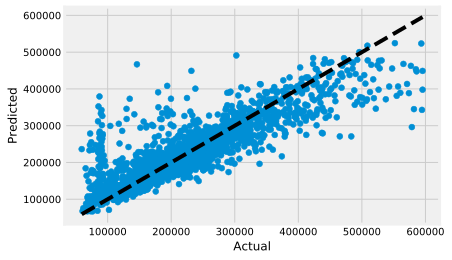

In [642]:
fig,ax = plt.subplots()
ax.scatter(total_valids, total_preds)
ax.plot([total_valids.min(), total_valids.max()], [total_valids.min(), total_valids.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
fig.show()

# Построим модель классификации на общем наборе данных для DistrictCluster
Эту модель мы будем использовать для классификации тестовой выборки

In [643]:
from sklearn.neighbors import KNeighborsClassifier

In [644]:
clf_fts = ['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2',
       'Social_3', 'Helthcare_2', 'Shops_1', 'Ecology_2_A',
       'Ecology_2_B', 'Ecology_3_A', 'Ecology_3_B', 'Shops_2_A', 'Shops_2_B']
cols_for_scaling = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2',
       'Social_3', 'Helthcare_2', 'Shops_1']

In [645]:
from sklearn.preprocessing import RobustScaler
r_scaler = RobustScaler()

In [646]:
x_train_scaled_for_knn = train[clf_fts]
x_train_scaled_for_knn.loc[:, cols_for_scaling] = r_scaler.fit_transform(x_train_scaled_for_knn.loc[:, cols_for_scaling])
x_train_scaled_for_knn.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
5861,123,0.0,1.623701,0.144851,1.375,-0.250,-0.750,1.148148,-0.423410,-0.633333,-0.445920,-0.4,-0.5,0.2,0,1,0,1,0,1
8051,1,1.0,0.424684,0.102168,0.250,0.125,0.000,0.555556,-0.279646,0.266667,-0.004194,-0.4,1.0,-0.4,0,1,0,1,0,1
9437,167,1.0,1.019086,0.747602,0.250,-0.500,-1.125,-0.629630,-0.141195,-0.133333,-0.184169,2.4,-0.5,0.0,0,1,0,1,0,1
5157,19,-1.0,-0.397824,-0.648355,0.500,0.625,1.000,0.962963,-0.417845,0.266667,0.261751,0.2,0.0,1.2,0,1,0,1,0,1
5729,23,0.0,0.147091,-0.241914,0.375,0.375,0.375,1.259259,0.001993,-0.633333,-0.672375,0.2,-0.5,-0.2,0,1,0,1,0,1


In [647]:
x_valid_scaled_for_knn = valid[clf_fts]
x_valid_scaled_for_knn.loc[:, cols_for_scaling] = r_scaler.transform(x_valid_scaled_for_knn.loc[:, cols_for_scaling])
x_valid_scaled_for_knn.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
5825,101,0.0,0.053133,-0.322688,0.375,-0.250,-0.250,-0.222222,-0.206197,0.100000,0.218067,-0.2,0.5,0.4,0,1,0,1,0,1
5171,44,-1.0,-0.717593,-0.833552,0.250,-0.750,-1.250,-0.592593,0.262537,0.000000,-0.098026,0.0,0.0,0.0,0,1,0,1,0,1
6041,96,0.0,0.109648,-0.163628,0.375,0.500,0.250,0.888889,-0.192593,0.933333,1.678665,0.4,0.0,0.2,0,1,0,1,0,1
107,159,1.0,0.386425,0.070796,0.000,-0.625,-0.625,-0.185185,-0.339109,-0.266667,-0.385462,11.4,-0.5,1.0,0,1,0,1,0,1
3422,58,-1.0,-0.328983,-0.610141,0.250,0.125,0.000,1.000000,1.317971,-0.466667,-0.443299,-0.2,-0.5,-0.6,0,1,0,1,0,1


In [648]:
from sklearn.metrics import accuracy_score

Опытным путем выяснено, что оптимальный результат на k = 3

In [649]:
cluster_classifier = KNeighborsClassifier(n_neighbors=3)
cluster_classifier.fit(x_train_scaled_for_knn, train.loc[:, 'DistrictCluster'])
y_pred = cluster_classifier.predict(x_valid_scaled_for_knn)
y_pred_train = cluster_classifier.predict(x_train_scaled_for_knn)
acc_valid = accuracy_score(valid.loc[:, 'DistrictCluster'], y_pred)
acc_train = accuracy_score(train.loc[:, 'DistrictCluster'], y_pred_train)

In [650]:
acc_valid

0.8964595858383434

Итого *cluster_classifier* - классификатор, который мы обучили на тренировочной выборке и применим к тестовой

In [651]:
test = pd.read_csv('test.csv')

Поправим данные в тесте, аналогично тренировочному набору

In [652]:
square_mean_3 = test.loc[test['Rooms']==3, 'Square'].mean()
square_mean_1 = test.loc[test['Rooms'] <= 1, 'Square'].mean()

In [653]:
test.loc[test['Id'] == 3343, 'Rooms'] = 5
test.loc[test['Id'] == 10729, 'Rooms'] = 4

test.loc[(test['Square'] < 15) & (test['LifeSquare'] < 15) & (test['Rooms']<=1), 'Square'] = square_mean_1

test.loc[(test['Square'] < 15) & (test['LifeSquare'] < 15) & (test['Rooms']==3), 'Square'] = square_mean_3

test.loc[(test['Square'] > 15) & (test['LifeSquare'] < 15), 'LifeSquare'] = test['Square']

test.loc[test['Square'] < test['LifeSquare'], 'LifeSquare'] = test['Square']

test['LifeSquare'] = test['LifeSquare'].fillna(data['Square'])

test = test.drop('Healthcare_1', axis=1)
test['LifeSquare'] = test['LifeSquare'].fillna(test['Square'])

test = pd.merge(test, district_stat, on=['DistrictId', 'Rooms'], how='left')
test = pd.merge(test, room_stat, on=['Rooms'], how='left')

test['MeanPrice'] = test['MeanPrice'].fillna(test['MeanPrice2'])

# Сложный случай. Берем цену из аналогичной квартиры в тренировочной выборке
test.loc[test['MeanPrice'].isnull(), 'MeanPrice'] = 78364.616704
# d = pd.read_csv('train.csv')
# d.loc[d['Rooms'] > 15, :]

In [654]:
test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,MeanPrice,MeanPrice2
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,4999.000000
mean,8412.595400,51.279200,1.911800,56.507631,41.804638,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1.31940,4.242800,214745.544471,214584.805721
std,4832.674037,44.179466,0.839382,18.989528,19.480504,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1.47994,4.777365,71649.010208,52412.838946
min,1.000000,0.000000,1.000000,2.900586,2.900586,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.00000,0.000000,78364.616704,159866.223972
25%,4221.750000,21.000000,1.000000,41.906231,28.085408,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,0.00000,1.000000,165673.416708,159866.223972
50%,8320.500000,37.000000,2.000000,52.921340,38.039217,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,1.00000,3.000000,198777.278269,214869.776407
75%,12598.250000,77.000000,2.000000,66.285129,49.854390,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,2.00000,6.000000,246262.924161,214869.776407
max,16795.000000,212.000000,17.000000,223.453689,275.645284,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,6.00000,23.000000,593618.746096,379906.894545


## Подготавливаем тестовую выборку к классификации

In [655]:
test = pd.get_dummies(test)

In [656]:
test.loc[:, cols_for_scaling] = r_scaler.transform(test.loc[:, cols_for_scaling])

In [657]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 23 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       5000 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null float64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null float64
Ecology_1        5000 non-null float64
Social_1         5000 non-null float64
Social_2         5000 non-null float64
Social_3         5000 non-null float64
Helthcare_2      5000 non-null float64
Shops_1          5000 non-null float64
MeanPrice        5000 non-null float64
MeanPrice2       4999 non-null float64
Ecology_2_A      5000 non-null uint8
Ecology_2_B      5000 non-null uint8
Ecology_3_A      5000 non-null uint8
Ecology_3_B      5000 non-null uint8
Shops_2_A        5000 non-null uint8
Shops_2_B        5000 non-null uint8
dtypes: floa

## Применяем классификатор и добавляем колонку с кластером

In [658]:
test_pred_clusters = cluster_classifier.predict(test.loc[:, clf_fts])

In [659]:
test['DistrictCluster'] = test_pred_clusters

Для каждого кластера применяем сохраненную модель регрессии

In [660]:
test_clusters_labels = test['DistrictCluster'].unique()

In [661]:
test_clusters = {}
for i in test_clusters_labels:
    test_clusters[i] = test.loc[test['DistrictCluster'] == i, :]

In [662]:
test_preds = {}
for i in test_clusters_labels:
    pred = models[i].predict(test_clusters[i].loc[:, fts])
    test_preds[i] = pred

In [663]:
total_preds_test = np.concatenate([test_preds[i] for i in test_clusters_labels])
ids = np.concatenate([test_clusters[i]['Id'].values for i in test_clusters_labels])

In [664]:
predictions = pd.DataFrame({'Id': ids, 'Price': total_preds_test})

In [665]:
predictions.head()

,Id,Price
0,725,122046.811809
1,14275,89050.713832
2,16688,112748.513686
3,6624,85948.486550
4,11513,112748.513686


In [666]:
predictions.reset_index()
predictions.to_csv('ABabitsyn_predictions.csv', index=False)

In [667]:
# Проверим эту схему на validation set

In [668]:
pd.DataFrame({ 'Actual': valid['DistrictCluster'].values, 'Predicted': y_pred})
valid_final = valid.loc[:, :]

Заменяем реальное значение DistrictCluster на предсказанное ранее

In [669]:
valid_final['DistrictCluster'] = y_pred

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [670]:
valid_clusters_labels = valid_final['DistrictCluster'].unique()
valid_clusters_labels

array([5, 1, 6, 9, 2, 3, 4, 7, 0], dtype=int64)

In [671]:
valid_clusters_groups = {}
for i in valid_clusters_labels:
    valid_clusters_groups[i] = valid_final.loc[valid_final['DistrictCluster'] == i, :]

In [672]:
valid_preds = {}
for i in valid_clusters_labels:
    pred = models[i].predict(valid_clusters_groups[i].loc[:, fts])
    valid_preds[i] = pred

In [673]:
total_valids_test = np.concatenate([valid_clusters_groups[i]['Price'].values for i in valid_clusters_labels])
total_preds_test = np.concatenate([valid_preds[i] for i in valid_clusters_labels])

In [674]:
r2(total_valids_test, total_preds_test)

0.751482826482462

In [675]:
ids = np.concatenate([valid_clusters_groups[i]['Id'].values for i in valid_clusters_labels])
id_act_pred = pd.DataFrame({'Id': ids, 'Actual': total_valids_test, 'Predicted': total_preds_test})
id_act_pred.head()

,Id,Actual,Predicted
0,1629,224967.995809,214906.511093
1,12782,162336.721266,163624.276380
2,9970,378581.541200,329325.186002
3,11201,89697.707309,257027.684087
4,8985,116999.465142,134979.138925


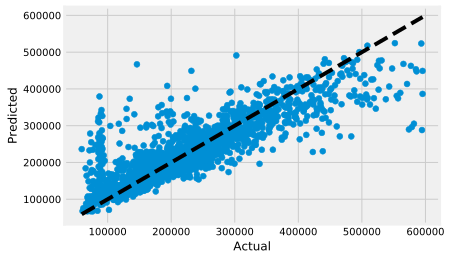

In [677]:
fig,ax = plt.subplots()
ax.scatter(total_valids_test, total_preds_test)
ax.plot([total_valids_test.min(), total_valids_test.max()], [total_valids_test.min(), total_valids_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
fig.show()